In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import figure
style.use('ggplot')

In [4]:
df = pd.read_csv('../data/processed/SFdep_budgets_1999-2017.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Department,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AAM Asian Art Museum,3.688368e+06,3.432263e+07,2.507488e+07,1.788011e+07,1.935935e+07,1.055472e+07,9.882500e+06,9.549676e+06,9.730164e+06,1.028110e+07,1.060280e+07,1.022601e+07,9.693537e+06,1.025095e+07,1.104159e+07,9.012591e+06,9.283314e+06,9.921711e+06,1.096220e+07
1,ADM Gen Svcs Agency-City Admin,1.516243e+08,2.148997e+08,3.627561e+08,2.268455e+08,3.137591e+08,2.129887e+08,1.574041e+08,1.846677e+08,2.262570e+08,2.177347e+08,2.160612e+08,1.841071e+08,2.022281e+08,2.287494e+08,1.981117e+08,1.790855e+08,2.352913e+08,3.554298e+08,4.721588e+08
2,ADP Adult Probation,1.148518e+07,1.235684e+07,1.024342e+07,1.039955e+07,1.051980e+07,9.902224e+06,1.065615e+07,1.123390e+07,1.190935e+07,1.202555e+07,1.255669e+07,1.212385e+07,1.310984e+07,2.335198e+07,3.526246e+07,3.573864e+07,3.966526e+07,4.700311e+07,4.692031e+07
3,AIR Airport Commission,2.278243e+09,1.831911e+09,1.835415e+09,1.444501e+09,1.224237e+09,1.237556e+09,1.190740e+09,1.210774e+09,1.266286e+09,1.325257e+09,1.419419e+09,1.974136e+09,1.567919e+09,1.546343e+09,1.960540e+09,2.583995e+09,2.272496e+09,2.449163e+09,1.994478e+09
4,ART Arts Commission,1.251809e+07,1.411478e+07,1.721827e+07,1.700585e+07,1.522773e+07,1.375732e+07,1.389025e+07,1.354485e+07,1.586172e+07,1.849631e+07,1.827977e+07,1.752000e+07,1.877900e+07,2.042381e+07,2.088583e+07,1.976552e+07,2.147180e+07,2.806038e+07,2.663214e+07


In [9]:
df.Department.values

array(['AAM Asian Art Museum', 'ADM Gen Svcs Agency-City Admin',
       'ADP Adult Probation', 'AIR Airport Commission',
       'ART Arts Commission', 'ASR Assessor / Recorder',
       'BOA Board Of Appeals - PAB', 'BOS Board Of Supervisors',
       'CAT City Attorney', 'CCD SF Communtiy College Dist',
       'CFC Children & Families Commsn', 'CHF Children;Youth & Families',
       'CII Commty Invest & Infrstrctr', 'CON Controller',
       'CPC City Planning', 'CRT Superior Court',
       'CSC Civil Service Commission', 'CSS Child Support Services',
       'CTA SF County Transprtn Auth', 'DAT District Attorney',
       'DBI Building Inspection', 'DEM Emergency Management',
       'DPH Public Health', 'DPW GSA - Public Works',
       'DT GSA - Technology', 'ECN Economic & Wrkfrce Dvlpmnt',
       'ENV Environment', 'ETH Ethics Commission', 'FAM Fine Arts Museum',
       'FIR Fire Department', 'GEN General City / Unallocated',
       'HHP CleanPowerSF', 'HHP Hetch Hetchy Water & Power',


In [10]:
df_pol = df[df.Department == 'POL Police']
df_pol

,Department,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
44,POL Police,2.877716e+08,3.174691e+08,3.423841e+08,3.463908e+08,3.622805e+08,3.433693e+08,3.675096e+08,4.048193e+08,4.352037e+08,4.692107e+08,4.799030e+08,5.026195e+08,5.110545e+08,5.395130e+08,5.706215e+08,5.773708e+08,5.913802e+08,6.266333e+08,650403966.2


In [5]:
df_pp_sums = df_pp.groupby(['Department'])[['Amount']].agg('sum')
df_pp_sums.columns = ['Dep_Sums_1999-2017']
df_pp_sums

,Dep_Sums_1999-2017
Department,
ADM Gen Svcs Agency-City Admin,3.658119e+07
ADP Adult Probation,3.764641e+08
CRT Superior Court,3.083808e+09
DAT District Attorney,8.784669e+08
DEM Emergency Management,2.021800e+09
FIR Fire Department,6.299810e+09
JUV Juvenile Probation,7.097967e+08
PDR Public Defender,4.196417e+08
POL Police,8.725909e+09


In [6]:
total_sum = df_pp_sums['Dep_Sums_1999-2017'].values.sum()
total_sum

25140783923.000057

In [7]:
police_sum = df_pp_sums[df_pp_sums.index == 'POL Police'].values.sum()
police_sum

8725908629.540045

In [8]:
others_sum = total_sum - police_sum

C:\Users\craig\Desktop\Anaconda\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


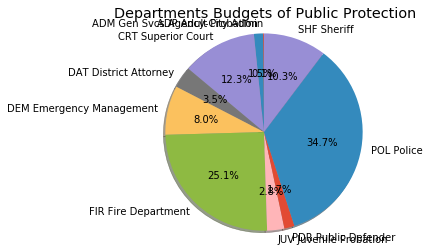

In [9]:
slices = [df_pp_sums['Dep_Sums_1999-2017'].values]
labels = df_pp_sums.index
fig, ax1 = plt.subplots()

ax1.pie(slices, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Departments Budgets of Public Protection')
plt.show()

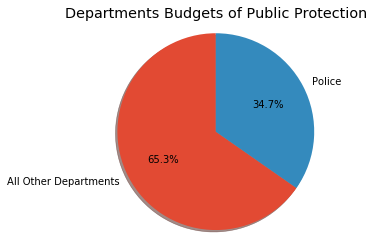

In [10]:
slices = [others_sum, police_sum]
labels = ['All Other Departments', 'Police']
fig, ax1 = plt.subplots()

ax1.pie(slices, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Departments Budgets of Public Protection')
# plt.pie(means, labels=labels)
plt.show()

Focusing more on the Police Department

In [11]:
df.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
0,1999,Revenue,No,Public Protection,ADP Adult Probation,Community Services,Charges For Services,Public Safety Service Charges,Other Public Safety Charges,General Fund,Operating,26742.00
1,1999,Spending,No,Public Protection,PDR Public Defender,Criminal And Special Defense,Non Personnel Services,Training,Training Costs Paid To Emplye,General Fund,Operating,425.83
2,1999,Spending,No,"Public Works, Transportation & Commerce",WTR Water Enterprise,Water Facilities Maintenance Projects,Salaries,Permanent Salaries-Misc,Misc-Other Timeoff,Water Operating Fund,Continuing Projects,17433.51
3,1999,Spending,No,General Administration & Finance,ADM Gen Svcs Agency-City Admin,Ag Wts & Measures Inspection,Non Personnel Services,Employee Expenses,Local Field Exp,General Fund,Work Orders/Overhead,24.00
4,1999,Spending,No,"Public Works, Transportation & Commerce",DPW GSA - Public Works,Engineering,Mandatory Fringe Benefits,Unemployment Insurance,Unemployment Insurance,General Fund,Continuing Projects,380.15


In [12]:
df_police = df[df['Department'] == 'POL Police']
df_police.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
93,1999,Spending,No,Public Protection,POL Police,Senior Escort Service,Mandatory Fringe Benefits,Social Security,Social Sec-Medicare(HI Only),General Fund,Operating,10958.13
94,1999,Spending,No,Public Protection,POL Police,Operations And Administration,Materials & Supplies,Other Materials & Supplies,Forms,General Fund,Operating,43255.58
106,1999,Spending,No,Public Protection,POL Police,Operations And Administration,Materials & Supplies,Building & Constructn Supplies,Small Tools And Intruments,General Fund,Operating,991.21
140,1999,Revenue,No,Public Protection,POL Police,Police Services,Intergovernmental Rev-Other,Other - Governmental Agencies,Other Local-Regional Grants,Public Protection Fund,Continuing Projects,3000.00
186,1999,Spending,No,Public Protection,POL Police,911/Communications,Salaries,Premium Pay,Premium Pay - Misc,General Fund,Operating,293054.99


In [13]:
df_police['Program'].value_counts()

Operations And Administration               3098
Investigations                              2547
Patrol                                      2483
Office Of Citizen Complaints                 952
Work Order Services                          790
Airport Police                               469
Crime Control                                279
SFPD Training                                267
Police Operations                            253
Special Operations                           210
SFPD-Recruitment And Examination Program     191
Senior Escort Service                        186
Fingerprint                                  123
No Program Defined                           123
Narcotics Forfeiture                          92
911/Communications                            92
Vehicle Theft Abatement                       72
Taxi Enforcement                              65
SFPD-Crime Photo Labs-Cri                     56
Police Services                               55
Capital Programs & C

In [14]:
df_police['Character'].value_counts()

Non Personnel Services            3069
Mandatory Fringe Benefits         2751
Salaries                          2010
Materials & Supplies              1750
Services Of Other Depts            944
Capital Outlay                     421
Charges For Services               416
Expenditure Recovery               349
Intergovernmental Rev-State        159
Intergovernmental Rev-Federal      143
Transfer Adjustments-Sources        92
Transfer Adjustments-Uses           92
Other Revenues                      71
Fines; Forfeitures & Penalties      64
Interest & Investment Income        60
Licenses; Permits & Franchises      32
Operating Transfers Out             27
Overhead and Allocations            15
Operating Transfers In              15
Intergovernmental Rev-Other          8
Other Support&Care Of Persons        7
City Grant Programs                  7
Intrafund Transfers Out              3
Intrafund Transfers In               2
Name: Character, dtype: int64

In [15]:
df_pol_programs = df_police.groupby(['Program'])[['Amount']].agg('sum')
df_pol_programs

,Amount
Program,
911/Communications,1.664207e+07
Airport Police,6.566977e+08
Capital Programs & Construction,2.440704e+06
Capital Projects,-2.579930e+05
City Capital Projects,6.630000e+02
Crime Control,3.557957e+08
Departmental Fund Transfer,1.152487e+06
Federal Transportation Security,1.101668e+07
Fingerprint,1.365089e+07


In [16]:
years = df['Fiscal Year'].unique()
years

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [17]:
df_year = []
for year in years:
    df_year.append( df_police[df_police['Fiscal Year'] == year])

In [18]:
df_year[0]

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
93,1999,Spending,No,Public Protection,POL Police,Senior Escort Service,Mandatory Fringe Benefits,Social Security,Social Sec-Medicare(HI Only),General Fund,Operating,10958.13
94,1999,Spending,No,Public Protection,POL Police,Operations And Administration,Materials & Supplies,Other Materials & Supplies,Forms,General Fund,Operating,43255.58
106,1999,Spending,No,Public Protection,POL Police,Operations And Administration,Materials & Supplies,Building & Constructn Supplies,Small Tools And Intruments,General Fund,Operating,991.21
140,1999,Revenue,No,Public Protection,POL Police,Police Services,Intergovernmental Rev-Other,Other - Governmental Agencies,Other Local-Regional Grants,Public Protection Fund,Continuing Projects,3000.00
186,1999,Spending,No,Public Protection,POL Police,911/Communications,Salaries,Premium Pay,Premium Pay - Misc,General Fund,Operating,293054.99
...,...,...,...,...,...,...,...,...,...,...,...,...
23416,1999,Revenue,No,Public Protection,POL Police,SFPD Training,Intergovernmental Rev-State,State - Other,Peace Officer Training,Public Protection Fund,Continuing Projects,636532.68
23430,1999,Spending,No,Public Protection,POL Police,Investigations,Salaries,Permanent Salaries-Misc,Perm Salaries-Misc-Regular,General Fund,Operating,20665671.86
23449,1999,Spending,No,Public Protection,POL Police,Office Of Citizen Complaints,Non Personnel Services,Training,Training Costs Paid To Emplye,General Fund,Operating,1005.11
23514,1999,Spending,No,Public Protection,POL Police,911/Communications,Mandatory Fringe Benefits,Social Security,Social Security (Oasdi & Hi),General Fund,Operating,450453.33


In [19]:
program_sums = []
for i in range(19):
    program_sums.append( pd.DataFrame(df_year[i].groupby('Program').Amount.agg('sum')) )
    col_year = years[i]
    program_sums[i].columns = [col_year]

In [20]:
df_aggregated = pd.concat(program_sums, axis=1)
df_aggregated

C:\Users\craig\Desktop\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
911/Communications,1.616017e+07,3.923009e+05,NaN,NaN,NaN,7.373300e+03,NaN,NaN,1.014080e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.497209e+04,5.614840e+03,2.062876e+04
Airport Police,1.806696e+07,2.112372e+07,2.509837e+07,2.691203e+07,2.514443e+07,2.675225e+07,2.783608e+07,2.957274e+07,3.138768e+07,3.151500e+07,3.621037e+07,3.654462e+07,4.041619e+07,4.378459e+07,4.406968e+07,4.500167e+07,4.644925e+07,4.892530e+07,5.188674e+07
Capital Programs & Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.426190e+05,1.302575e+06,NaN,1.547123e+05,1.441829e+05,1.508661e+05,1.480664e+05,1.976820e+05
Capital Projects,NaN,-3.550000e+05,NaN,NaN,NaN,9.700700e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City Capital Projects,6.630000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crime Control,8.087882e+06,1.328624e+07,1.436363e+07,1.333525e+07,1.359413e+07,1.156405e+07,1.397536e+07,1.913258e+07,1.989076e+07,2.538111e+07,2.027493e+07,2.184011e+07,2.079198e+07,2.249845e+07,2.113642e+07,2.104378e+07,2.157981e+07,2.693070e+07,2.708857e+07
Departmental Fund Transfer,NaN,NaN,NaN,NaN,NaN,4.717784e+05,-3.350000e+02,1.152822e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.717784e+05,NaN
Federal Transportation Security,NaN,NaN,NaN,NaN,1.114382e+07,-1.271356e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fingerprint,1.759181e+06,1.184828e+06,5.632793e+06,2.439028e+06,1.491430e+06,1.143626e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investigations,3.608852e+07,3.982889e+07,4.049413e+07,4.397617e+07,5.116861e+07,5.035600e+07,5.951581e+07,6.272322e+07,6.675158e+07,7.235046e+07,7.275879e+07,6.679826e+07,6.444721e+07,6.959713e+07,7.715829e+07,7.954922e+07,7.907833e+07,8.270760e+07,8.665262e+07


In [21]:
df_aggregated = df_aggregated.fillna(0)

In [22]:
df_aggregated

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
911/Communications,1.616017e+07,3.923009e+05,0.000000e+00,0.000000e+00,0.000000e+00,7.373300e+03,0.000000e+00,0.000000e+00,1.014080e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.497209e+04,5.614840e+03,2.062876e+04
Airport Police,1.806696e+07,2.112372e+07,2.509837e+07,2.691203e+07,2.514443e+07,2.675225e+07,2.783608e+07,2.957274e+07,3.138768e+07,3.151500e+07,3.621037e+07,3.654462e+07,4.041619e+07,4.378459e+07,4.406968e+07,4.500167e+07,4.644925e+07,4.892530e+07,5.188674e+07
Capital Programs & Construction,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.426190e+05,1.302575e+06,0.000000e+00,1.547123e+05,1.441829e+05,1.508661e+05,1.480664e+05,1.976820e+05
Capital Projects,0.000000e+00,-3.550000e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.700700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
City Capital Projects,6.630000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Crime Control,8.087882e+06,1.328624e+07,1.436363e+07,1.333525e+07,1.359413e+07,1.156405e+07,1.397536e+07,1.913258e+07,1.989076e+07,2.538111e+07,2.027493e+07,2.184011e+07,2.079198e+07,2.249845e+07,2.113642e+07,2.104378e+07,2.157981e+07,2.693070e+07,2.708857e+07
Departmental Fund Transfer,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.717784e+05,-3.350000e+02,1.152822e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.717784e+05,0.000000e+00
Federal Transportation Security,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.114382e+07,-1.271356e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Fingerprint,1.759181e+06,1.184828e+06,5.632793e+06,2.439028e+06,1.491430e+06,1.143626e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Investigations,3.608852e+07,3.982889e+07,4.049413e+07,4.397617e+07,5.116861e+07,5.035600e+07,5.951581e+07,6.272322e+07,6.675158e+07,7.235046e+07,7.275879e+07,6.679826e+07,6.444721e+07,6.959713e+07,7.715829e+07,7.954922e+07,7.907833e+07,8.270760e+07,8.665262e+07


In [23]:
df_transposed = df_aggregated.T

In [24]:
programs = df_transposed.columns

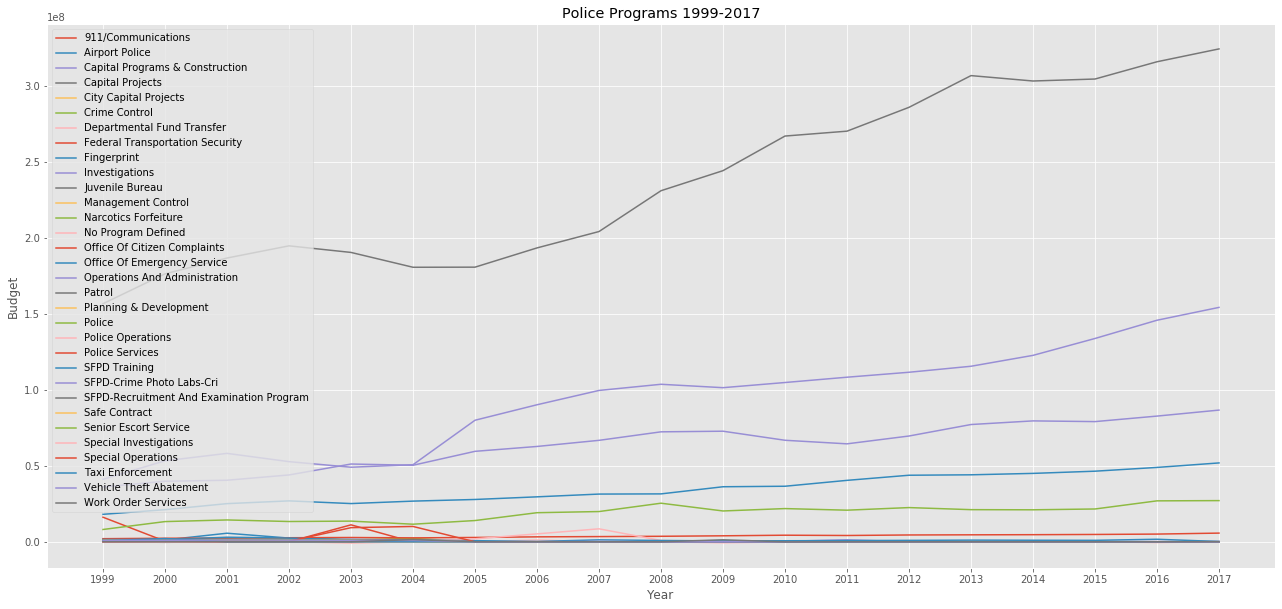

In [25]:

plt.figure(figsize=(22,10))

plt.title('Police Programs 1999-2017')
plt.xlabel('Year')
plt.ylabel('Budget')


plt.xticks(np.arange(min(np.array(df_transposed.index)), max(np.array(df_transposed.index))+1, 1.0))

for program in programs:
    plt.plot(df_transposed.index, np.array(df_transposed[program]),
         label=program)


plt.legend()
plt.show()

In [26]:
sum_program = np.array([])
for program in programs:
    sum_val = df_transposed[program].sum()
    sum_program = np.append(sum_program, sum_val)
sum_program

array([ 1.66420724e+07,  6.56697679e+08,  2.44070371e+06, -2.57993000e+05,
        6.63000000e+02,  3.55795747e+08,  1.15248748e+06,  1.10166819e+07,
        1.36508861e+07,  1.20200084e+09,  1.41251970e+05,  2.03740000e+02,
        9.38325380e+06, -1.13636873e+06,  6.96571229e+07,  6.50687420e+05,
        1.77645831e+09,  4.51676769e+09,  1.41861462e+06,  1.47217000e+04,
        1.86475509e+07,  7.04156340e+05,  2.14148426e+07,  3.21960399e+06,
        8.29307808e+06,  3.65608466e+06,  5.58211579e+06,  3.52823000e+04,
        2.02804998e+07,  2.79372002e+06,  5.99774239e+06,  2.78869725e+06])

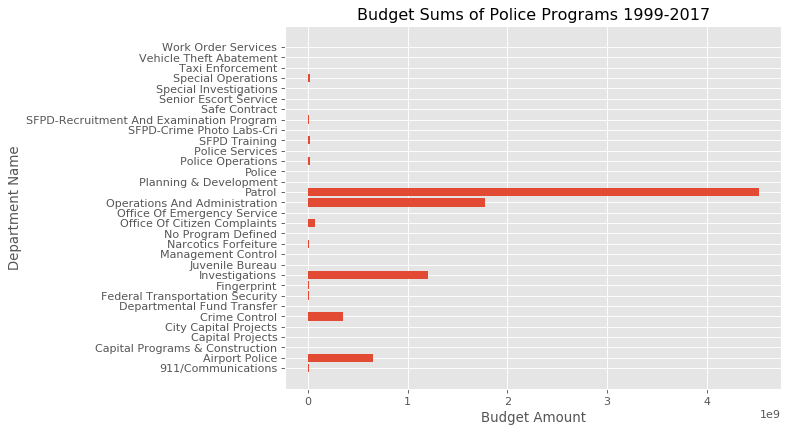

In [27]:
y_pos = np.arange(len(sum_program))
program_names = np.array(df_transposed.columns)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Budget Sums of Police Programs 1999-2017')
plt.barh(y_pos, sum_program)
plt.yticks(y_pos, program_names)
plt.xlabel('Budget Amount')
plt.ylabel('Department Name')
plt.show()

In [28]:
# removing the 5 largest programs from the graph to look at the other programs with less funding
largest_programs = np.array(['Patrol', 'Operations And Administration', 
                             'Investigations', 'Crime Control', 'Airport Police'])
indices = np.array([], int)
for l_program in largest_programs:
    index = int(np.where(program_names == l_program)[0])
    indices = np.append(indices, index)
indices

array([17, 16,  9,  5,  1])

In [29]:
for index in indices:
    name = program_names[index]
    amount = sum_program[index]
    print('Program Name: {}, Program Amount: {}, Index: {}'.format(name, amount, index))

Program Name: Patrol, Program Amount: 4516767685.180001, Index: 17
Program Name: Operations And Administration, Program Amount: 1776458312.83, Index: 16
Program Name: Investigations, Program Amount: 1202000842.04, Index: 9
Program Name: Crime Control, Program Amount: 355795747.23999995, Index: 5
Program Name: Airport Police, Program Amount: 656697679.1599998, Index: 1


In [30]:
smaller_programs = np.copy(program_names)
smaller_budgets = np.copy(sum_program)

In [31]:
smaller_programs = np.delete(smaller_programs, indices)
smaller_budgets = np.delete(smaller_budgets, indices)

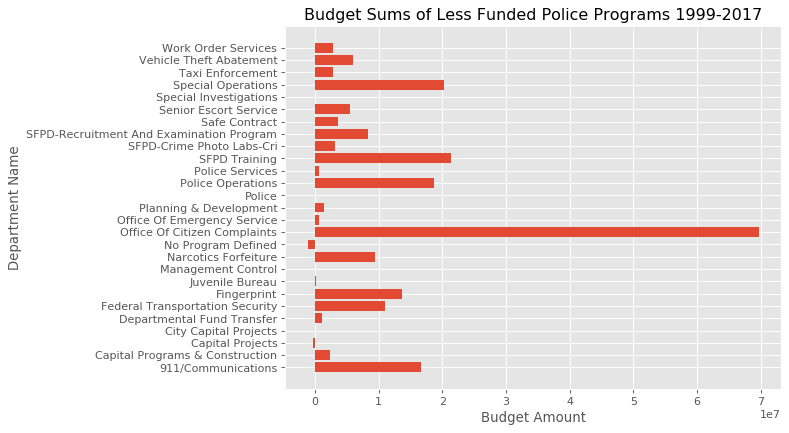

In [32]:
y_pos = np.arange(len(smaller_budgets))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Budget Sums of Less Funded Police Programs 1999-2017')
plt.barh(y_pos, smaller_budgets)
plt.yticks(y_pos, smaller_programs)
plt.xlabel('Budget Amount')
plt.ylabel('Department Name')
plt.show()

In [33]:
programs_of_interest = np.array(['Office Of Citizen Complaints', 'SFPD Training', 
                                 'Special Operations', 'Police Operations', '911/Communications',
                                 'SFPD-Recruitment And Examination Program'])
indices = np.array([], int)
for i_program in programs_of_interest:
    index = np.where(program_names == i_program)
    print(program_names[index])
    print(sum_program[index])
    indices = np.append(indices, index)
indices

['Office Of Citizen Complaints']
[69657122.94999999]
['SFPD Training']
[21414842.57]
['Special Operations']
[20280499.75]
['Police Operations']
[18647550.86]
['911/Communications']
[16642072.39]
['SFPD-Recruitment And Examination Program']
[8293078.08]


array([14, 22, 28, 20,  0, 24], dtype=int64)

In [34]:
for index in indices:
    name = program_names[index]
    amount = sum_program[index]
    print('Program Name: {}, Program Amount: {}, Index: {}'.format(name, amount, index))

Program Name: Office Of Citizen Complaints, Program Amount: 69657122.94999999, Index: 14
Program Name: SFPD Training, Program Amount: 21414842.570000004, Index: 22
Program Name: Special Operations, Program Amount: 20280499.75, Index: 28
Program Name: Police Operations, Program Amount: 18647550.86, Index: 20
Program Name: 911/Communications, Program Amount: 16642072.39, Index: 0
Program Name: SFPD-Recruitment And Examination Program, Program Amount: 8293078.080000001, Index: 24


In [35]:
# creating new datasets specialized on the programs we want to focus on
df_pol_patrol = df_police[df_police['Program'] == 'Patrol']
df_pol_spec_ops = df_police[df_police['Program'] == 'Special Operations']
df_pol_admin = df_police[df_police['Program'] == 'Operations And Administration']
df_pol_recruit = df_police[df_police['Program'] == 'SFPD-Recruitment And Examination Program']
df_pol_train = df_police[df_police['Program'] == 'SFPD Training']

Taking a deeper dive into the Patrol Program, since this is the most funded program of the Police

In [36]:
df_pol_patrol.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
512,1999,Spending,No,Public Protection,POL Police,Patrol,Mandatory Fringe Benefits,Social Security,Social Sec-Medicare(HI Only),Public Protection Fund,Grants,1422.94
575,1999,Spending,No,Public Protection,POL Police,Patrol,Non Personnel Services,Profess & Specialized Svcs,Other Professional Services,General Fund,Operating,520.80
820,1999,Spending,No,Public Protection,POL Police,Patrol,Non Personnel Services,Training,Training Costs Paid To Emplye,Public Protection Fund,Continuing Projects,783.00
893,1999,Spending,No,Public Protection,POL Police,Patrol,Mandatory Fringe Benefits,Social Security,Social Security (Oasdi & Hi),Public Protection Fund,Continuing Projects,584.48
3529,1999,Spending,No,Public Protection,POL Police,Patrol,Salaries,Permanent Salaries-Misc,Misc-Disability Pay,General Fund,Operating,2885683.63


In [37]:
df_pol_patrol['Character'].value_counts()

Mandatory Fringe Benefits         579
Non Personnel Services            500
Salaries                          442
Materials & Supplies              373
Services Of Other Depts           267
Capital Outlay                     81
Intergovernmental Rev-Federal      43
Charges For Services               35
Intergovernmental Rev-State        30
Transfer Adjustments-Uses          25
Transfer Adjustments-Sources       25
Other Revenues                     19
Expenditure Recovery               18
Operating Transfers Out            12
Interest & Investment Income       10
Operating Transfers In              9
Overhead and Allocations            6
City Grant Programs                 4
Intrafund Transfers In              2
Intrafund Transfers Out             1
Licenses; Permits & Franchises      1
Intergovernmental Rev-Other         1
Name: Character, dtype: int64

In [38]:
df_patrol_sums = df_pol_patrol.groupby(['Character'])[['Amount']].agg('sum')
df_patrol_sums

,Amount
Character,
Capital Outlay,1.280888e+07
Charges For Services,1.872790e+07
City Grant Programs,1.461323e+05
Expenditure Recovery,1.441527e+07
Interest & Investment Income,1.597164e+05
Intergovernmental Rev-Federal,5.400883e+07
Intergovernmental Rev-Other,4.432516e+04
Intergovernmental Rev-State,2.038458e+08
Intrafund Transfers In,7.909720e+05


In [39]:
df_patrol_ch = np.array(df_patrol_sums.index)

In [40]:
df_patrol_vals = np.array(df_patrol_sums['Amount'])

In [41]:
df_patrol_sums[df_patrol_sums.index == 'Mandatory Fringe Benefits']

,Amount
Character,
Mandatory Fringe Benefits,6.674038e+08


In [42]:
df_pol_patrol[df_pol_patrol['Character'] == 'Salaries']['Object'].value_counts()

Permanent Salaries-Misc    239
Overtime                    67
One-Time Payments           48
Premium Pay                 47
Holiday Pay                 41
Name: Object, dtype: int64

In [43]:
df_pol_patrol[df_pol_patrol['Character'] == 'Salaries'][['Object', 'Amount']].groupby('Object').agg('sum')

,Amount
Object,
Holiday Pay,8.025669e+07
One-Time Payments,5.269974e+07
Overtime,2.187603e+08
Permanent Salaries-Misc,2.705054e+09
Premium Pay,1.510441e+08


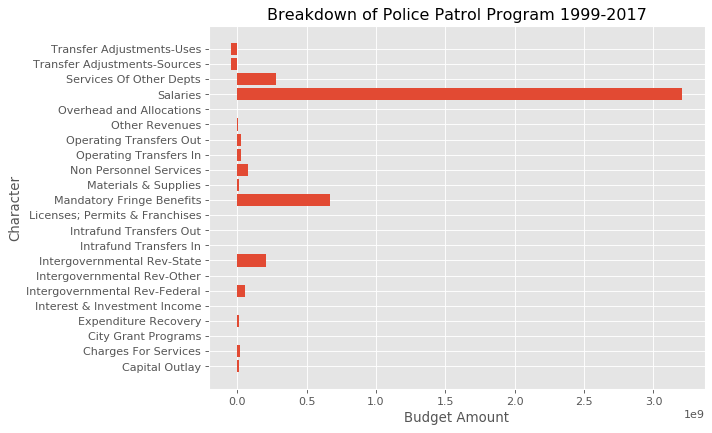

In [44]:
y_pos = np.arange(len(df_patrol_ch))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Breakdown of Police Patrol Program 1999-2017')
plt.barh(y_pos, df_patrol_vals)
plt.yticks(y_pos, df_patrol_ch)
plt.xlabel('Budget Amount')
plt.ylabel('Character')
plt.show()

In [45]:
# df_pol_spec_ops_ch

In [46]:
df_pol_spec_ops[df_pol_spec_ops['Character'] == 'Charges For Services']

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
135081,2004,Revenue,No,Public Protection,POL Police,Special Operations,Charges For Services,Public Safety Service Charges,Other Public Safety Charges,General Fund,Operating,11999.17


In [47]:
df_pol_spec_ops_ch = df_pol_spec_ops.groupby(['Character'])[['Amount']].agg('sum')
df_pol_spec_ops_ch['Amount'].values

array([1.82788260e+05, 1.19991700e+04, 1.78655264e+06, 4.54847070e+05,
       8.95092030e+05, 2.00000000e+02, 1.69187206e+07, 3.03000000e+04])

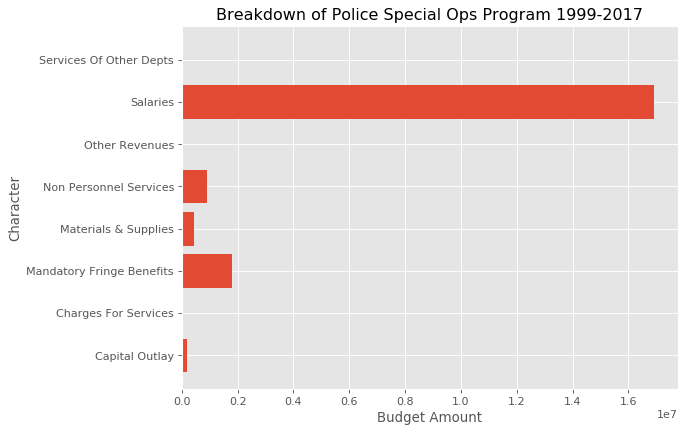

In [48]:
y_pos = np.arange(len(df_pol_spec_ops_ch.index))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Breakdown of Police Special Ops Program 1999-2017')
plt.barh(y_pos, df_pol_spec_ops_ch['Amount'].values)
plt.yticks(y_pos, df_pol_spec_ops_ch.index)
plt.xlabel('Budget Amount')
plt.ylabel('Character')
plt.show()

In [49]:
df_pol_admin_ch = df_pol_admin.groupby(['Character'])[['Amount']].agg('sum')
df_pol_admin_ch

,Amount
Character,
Capital Outlay,4.768583e+07
Charges For Services,6.991802e+07
City Grant Programs,5.731230e+05
Expenditure Recovery,2.565250e+06
Fines; Forfeitures & Penalties,9.298113e+06
Interest & Investment Income,5.971220e+03
Intergovernmental Rev-Federal,7.029566e+06
Intergovernmental Rev-Other,4.700000e+04
Intergovernmental Rev-State,5.066407e+08


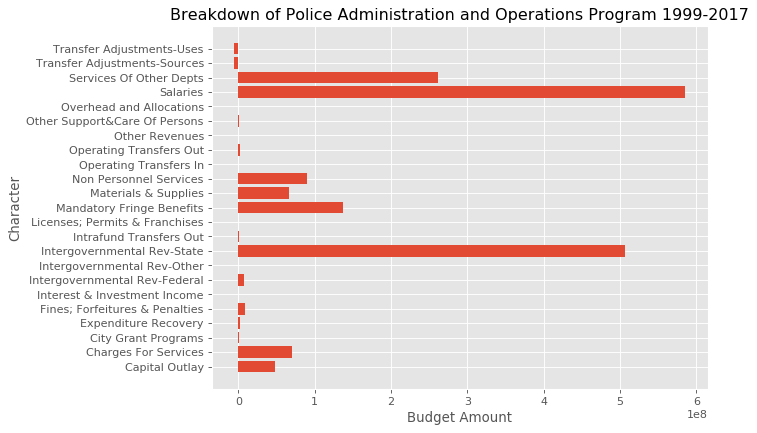

In [50]:
y_pos = np.arange(len(df_pol_admin_ch.index))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Breakdown of Police Administration and Operations Program 1999-2017')
plt.barh(y_pos, df_pol_admin_ch['Amount'].values)
plt.yticks(y_pos, df_pol_admin_ch.index)
plt.xlabel('Budget Amount')
plt.ylabel('Character')
plt.show()

In [51]:
df_pol_recruit_ch = df_pol_recruit.groupby(['Character'])[['Amount']].agg('sum')
df_pol_recruit_ch

,Amount
Character,
Capital Outlay,18452.60
Expenditure Recovery,-21717.16
Mandatory Fringe Benefits,888665.43
Materials & Supplies,305677.10
Non Personnel Services,2487472.08
Overhead and Allocations,-6.53
Salaries,4199327.92
Services Of Other Depts,371772.32
Transfer Adjustments-Sources,21717.16


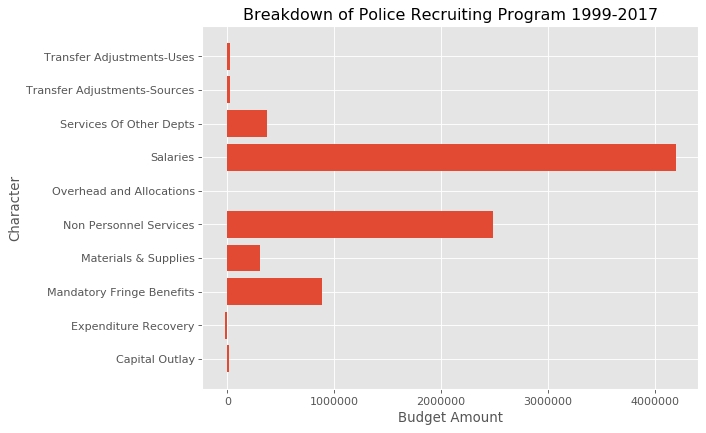

In [52]:
y_pos = np.arange(len(df_pol_recruit_ch.index))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Breakdown of Police Recruiting Program 1999-2017')
plt.barh(y_pos, df_pol_recruit_ch['Amount'].values)
plt.yticks(y_pos, df_pol_recruit_ch.index)
plt.xlabel('Budget Amount')
plt.ylabel('Character')
plt.show()

In [53]:
df_pol_train_ch = df_pol_train.groupby(['Character'])[['Amount']].agg('sum')
df_pol_train_ch

,Amount
Character,
Capital Outlay,954702.69
Charges For Services,148743.94
Intergovernmental Rev-State,10877961.00
Mandatory Fringe Benefits,32406.95
Materials & Supplies,807337.21
Non Personnel Services,3901039.43
Salaries,4211198.90
Services Of Other Depts,481452.45


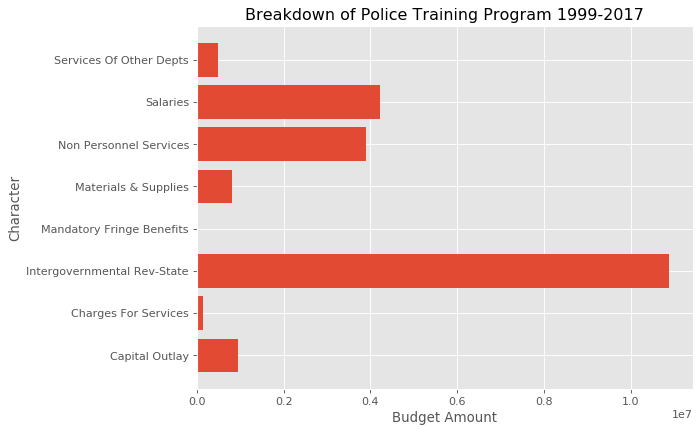

In [54]:
y_pos = np.arange(len(df_pol_train_ch.index))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Breakdown of Police Training Program 1999-2017')
plt.barh(y_pos, df_pol_train_ch['Amount'].values)
plt.yticks(y_pos, df_pol_train_ch.index)
plt.xlabel('Budget Amount')
plt.ylabel('Character')
plt.show()

Looking at trends of the budget data over time

In [55]:
df_police.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
93,1999,Spending,No,Public Protection,POL Police,Senior Escort Service,Mandatory Fringe Benefits,Social Security,Social Sec-Medicare(HI Only),General Fund,Operating,10958.13
94,1999,Spending,No,Public Protection,POL Police,Operations And Administration,Materials & Supplies,Other Materials & Supplies,Forms,General Fund,Operating,43255.58
106,1999,Spending,No,Public Protection,POL Police,Operations And Administration,Materials & Supplies,Building & Constructn Supplies,Small Tools And Intruments,General Fund,Operating,991.21
140,1999,Revenue,No,Public Protection,POL Police,Police Services,Intergovernmental Rev-Other,Other - Governmental Agencies,Other Local-Regional Grants,Public Protection Fund,Continuing Projects,3000.00
186,1999,Spending,No,Public Protection,POL Police,911/Communications,Salaries,Premium Pay,Premium Pay - Misc,General Fund,Operating,293054.99


In [57]:
df_year = []
for index, year in enumerate(df_police['Fiscal Year'].unique()):
    df_year.append( df[df['Fiscal Year'] == year])

In [198]:
df_year[0].head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
0,1999,Revenue,No,Public Protection,ADP Adult Probation,Community Services,Charges For Services,Public Safety Service Charges,Other Public Safety Charges,General Fund,Operating,26742.00
1,1999,Spending,No,Public Protection,PDR Public Defender,Criminal And Special Defense,Non Personnel Services,Training,Training Costs Paid To Emplye,General Fund,Operating,425.83
2,1999,Spending,No,"Public Works, Transportation & Commerce",WTR Water Enterprise,Water Facilities Maintenance Projects,Salaries,Permanent Salaries-Misc,Misc-Other Timeoff,Water Operating Fund,Continuing Projects,17433.51
3,1999,Spending,No,General Administration & Finance,ADM Gen Svcs Agency-City Admin,Ag Wts & Measures Inspection,Non Personnel Services,Employee Expenses,Local Field Exp,General Fund,Work Orders/Overhead,24.00
4,1999,Spending,No,"Public Works, Transportation & Commerce",DPW GSA - Public Works,Engineering,Mandatory Fringe Benefits,Unemployment Insurance,Unemployment Insurance,General Fund,Continuing Projects,380.15


In [61]:
program_sums = []
for i in range(19):
    program_sums.append( pd.DataFrame(df_year[i].groupby('Program').Amount.agg('sum')) )
    col_year = years[i]
    program_sums[i].columns = [col_year]

Looking at certain prorgams and as they change over time, these programs are 
-Patrol
-Special Operations
-Administration and Operations
-Police Recruiting
-Police Training

In [190]:
df_agg_programs=pd.concat(program_sums, axis=1)
df_agg_programs.fillna(0, inplace=True)
df_agg_programs.head()

C:\Users\craig\Desktop\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1660 Mission Street Building,2375527.99,2303120.36,2656967.90,3050825.42,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25 Van Ness Building,4750712.86,5408838.48,6159096.35,5070357.14,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
30 Van Ness Building,0.00,0.00,0.00,75113448.23,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
311 Call Center,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5226796.34,7938438.63,3980095.29,4327345.5,3323478.14,3612069.11,4127040.11,4132987.24,4418793.59,4640245.59,6249178.77
3Com Park,19646512.14,17023628.77,10107891.64,8941622.16,12178551.64,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [199]:
important_programs = ['Patrol', 'Operations And Administration', 'Special Operations',
                      'SFPD-Recruitment And Examination Program', 'SFPD Training']

In [205]:
df_agg_programs = df_agg_programs.loc[important_programs]

In [217]:
df_tran_programs = df_agg_programs.T

In [220]:
df_tran_programs

,Patrol,Operations And Administration,Special Operations,SFPD-Recruitment And Examination Program,SFPD Training
1999,1.566657e+08,4.110268e+07,151017.92,1292994.89,1490869.85
2000,1.763137e+08,5.329274e+07,305729.53,1544261.40,1380405.97
2001,1.867238e+08,5.817293e+07,163570.07,1735868.52,3000961.24
2002,1.947401e+08,5.272834e+07,291461.02,1344727.58,2465499.89
2003,1.904606e+08,4.906499e+07,9285482.67,1383969.78,1099537.23
2004,1.806452e+08,5.071372e+07,10083238.54,991255.91,1048983.57
2005,1.807123e+08,7.997473e+07,0.00,0.00,731208.16
2006,1.933768e+08,9.016354e+07,0.00,0.00,223558.12
2007,2.041555e+08,9.958305e+07,0.00,0.00,1261131.59
2008,2.310162e+08,1.036423e+08,0.00,0.00,855390.40


In [232]:
labels = list(df_tran_programs.columns)

In [242]:
labels

['Patrol',
 'Operations And Administration',
 'Special Operations',
 'SFPD-Recruitment And Examination Program',
 'SFPD Training']

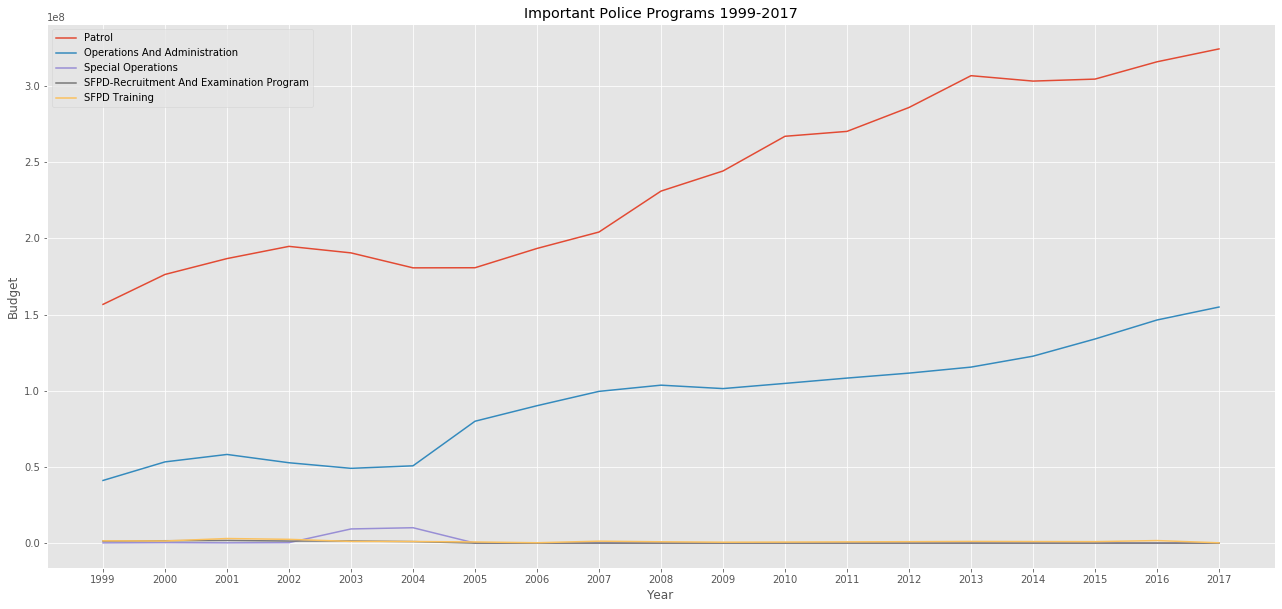

In [241]:

plt.figure(figsize=(22,10))

plt.title('Important Police Programs 1999-2017')
plt.xlabel('Year')
plt.ylabel('Budget')


plt.xticks(np.arange(min(np.array(df_tran_programs.index)), max(np.array(df_tran_programs.index))+1, 
                     1.0))

for program in labels:
    plt.plot(df_tran_programs.index, np.array(df_tran_programs[program]),
         label=program)


plt.legend()
plt.show()

In [246]:
labels2 = labels[2:]
labels2

['Special Operations',
 'SFPD-Recruitment And Examination Program',
 'SFPD Training']

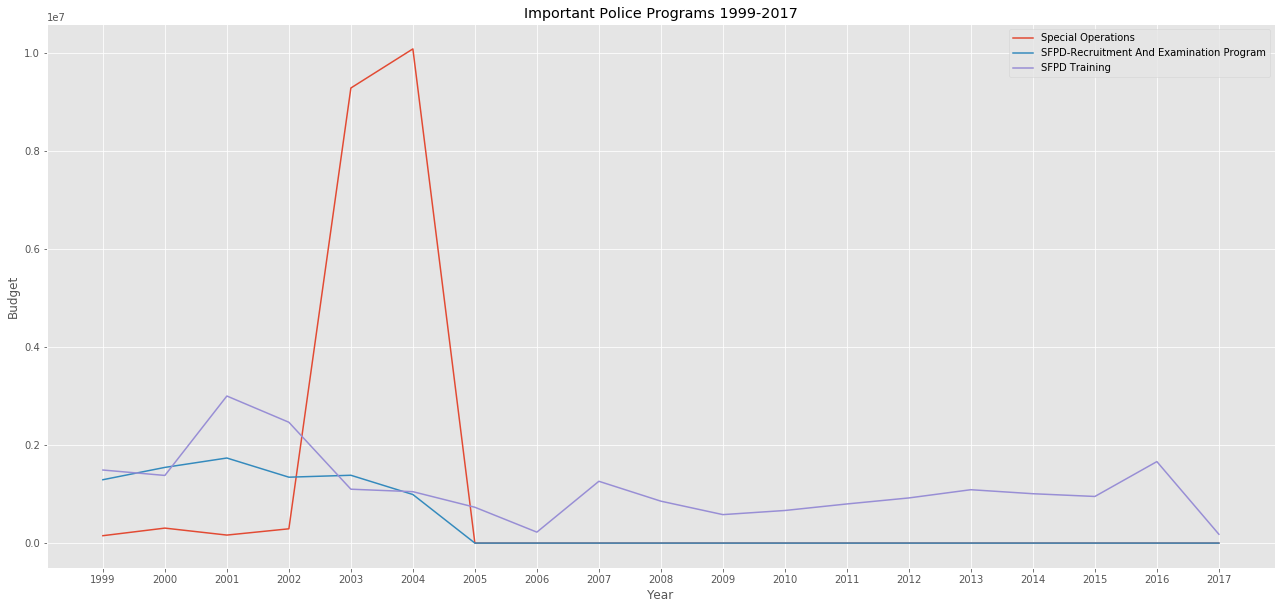

In [249]:

plt.figure(figsize=(22,10))

plt.title('Important Police Programs 1999-2017')
plt.xlabel('Year')
plt.ylabel('Budget')


plt.xticks(np.arange(min(np.array(df_tran_programs.index)), max(np.array(df_tran_programs.index))+1, 
                     1.0))

for program in labels2:
    plt.plot(df_tran_programs.index, np.array(df_tran_programs[program]),
         label=program)


plt.legend()
plt.show()

In [250]:
df_tran_programs

,Patrol,Operations And Administration,Special Operations,SFPD-Recruitment And Examination Program,SFPD Training
1999,1.566657e+08,4.110268e+07,151017.92,1292994.89,1490869.85
2000,1.763137e+08,5.329274e+07,305729.53,1544261.40,1380405.97
2001,1.867238e+08,5.817293e+07,163570.07,1735868.52,3000961.24
2002,1.947401e+08,5.272834e+07,291461.02,1344727.58,2465499.89
2003,1.904606e+08,4.906499e+07,9285482.67,1383969.78,1099537.23
2004,1.806452e+08,5.071372e+07,10083238.54,991255.91,1048983.57
2005,1.807123e+08,7.997473e+07,0.00,0.00,731208.16
2006,1.933768e+08,9.016354e+07,0.00,0.00,223558.12
2007,2.041555e+08,9.958305e+07,0.00,0.00,1261131.59
2008,2.310162e+08,1.036423e+08,0.00,0.00,855390.40
